In [46]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from EDA import EDA
from GradientDescent import GradientDescent as GD

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
colNames = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

In [3]:
df = pd.read_csv(r"C:\Users\ZiKa\Desktop\ML\iris.data", header=None, names=colNames)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Add column for target label encoded

In [4]:
LE = LabelEncoder()
LE.fit(df['species'])
df['target'] = LE.transform(df['species'])

### Data has no null values so seems good for now and the types of columns seems correct too.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
 5   target        150 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


### The 3 species are balnced in smaples

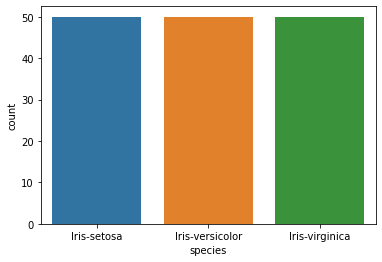

In [6]:
sns.countplot(x=df['species']);

## Split data for training and testing

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(df.iloc[:, :5], df.iloc[:, [-1]], test_size=0.2, random_state=42)

In [8]:
train_data = pd.DataFrame(np.c_[xTrain, yTrain])
train_data.columns = colNames + ['target']
train_data.head()

,sepal length,sepal width,petal length,petal width,species,target
0,4.6,3.6,1.0,0.2,Iris-setosa,0
1,5.7,4.4,1.5,0.4,Iris-setosa,0
2,6.7,3.1,4.4,1.4,Iris-versicolor,1
3,4.8,3.4,1.6,0.2,Iris-setosa,0
4,4.4,3.2,1.3,0.2,Iris-setosa,0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal length  120 non-null    object
 1   sepal width   120 non-null    object
 2   petal length  120 non-null    object
 3   petal width   120 non-null    object
 4   species       120 non-null    object
 5   target        120 non-null    object
dtypes: object(6)
memory usage: 5.8+ KB


In [10]:
cols = train_data.columns.tolist()
cols.remove('species')
train_data[cols] = train_data[cols].apply(pd.to_numeric, errors='coerce')

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  120 non-null    float64
 1   sepal width   120 non-null    float64
 2   petal length  120 non-null    float64
 3   petal width   120 non-null    float64
 4   species       120 non-null    object 
 5   target        120 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 5.8+ KB


In [12]:
iris = EDA(data=train_data, target='target')

In [13]:
iris.checkOutliers()

{'sepal length': {'Lower Bound': 3.1499999999999986,
  'Below Lower': [],
  'Upper Bound': 8.350000000000001,
  'Above Upper': []},
 'sepal width': {'Lower Bound': 2.0125,
  'Below Lower': [29],
  'Upper Bound': 4.1125,
  'Above Upper': [1, 41]},
 'petal length': {'Lower Bound': -3.8999999999999995,
  'Below Lower': [],
  'Upper Bound': 10.5,
  'Above Upper': []},
 'petal width': {'Lower Bound': -1.95,
  'Below Lower': [],
  'Upper Bound': 4.05,
  'Above Upper': []},
 'target': {'Lower Bound': -3.0,
  'Below Lower': [],
  'Upper Bound': 5.0,
  'Above Upper': []}}

In [14]:
iris.data.describe()

,sepal length,sepal width,petal length,petal width,target
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.057500,3.727500,1.182500,0.991667
std,0.823805,0.446398,1.751252,0.753442,0.814736
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.500000,0.300000,0.000000
50%,5.750000,3.000000,4.250000,1.300000,1.000000
75%,6.400000,3.325000,5.100000,1.800000,2.000000
max,7.700000,4.400000,6.700000,2.500000,2.000000


### Outliers doesn't look that much of extreme so i will let it go through with data

In [15]:
iris.data.loc[[1, 41]]

,sepal length,sepal width,petal length,petal width,species,target
1,5.7,4.4,1.5,0.4,Iris-setosa,0
41,5.5,4.2,1.4,0.2,Iris-setosa,0


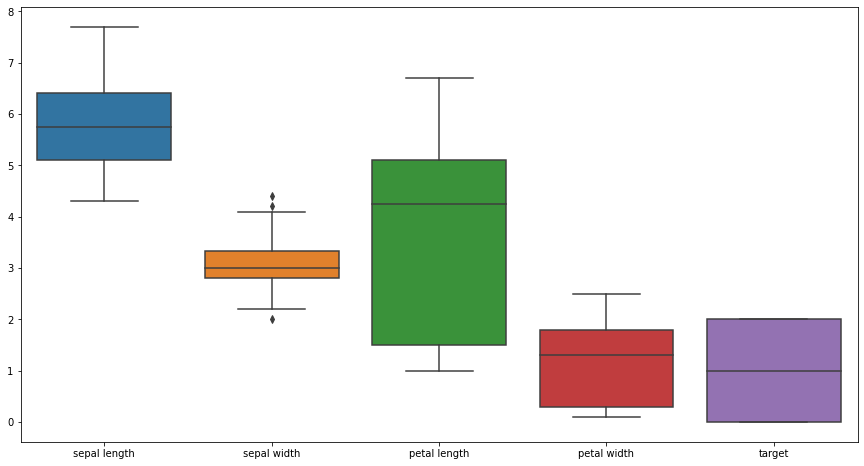

In [16]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot()
sns.boxplot(ax=ax, data=iris.data);

## Check for duplicates in the data
#### 1- duplicated rows

In [17]:
iris.data.duplicated().sum()

2

In [18]:
iris.data.drop_duplicates(inplace=True)

In [19]:
iris.data.duplicated().sum()

0

#### 2- duplicated values in columns

In [20]:
iris.handleDuplicates()

[]

## Check feature relation and seperability for classification

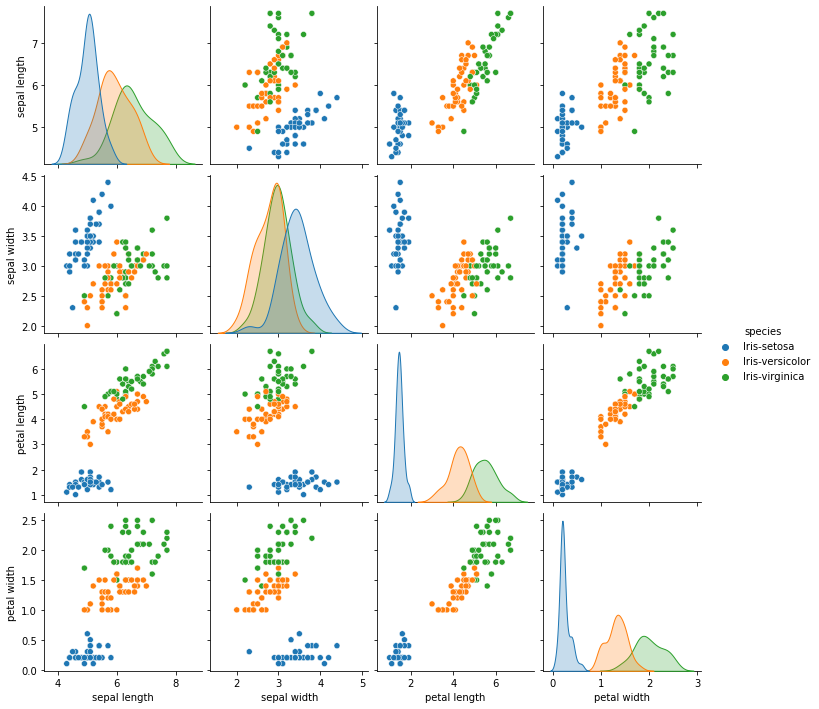

In [21]:
sns.pairplot(data=iris.data.iloc[:, :5], hue='species');

### Petal width VS Petal length look very seperable

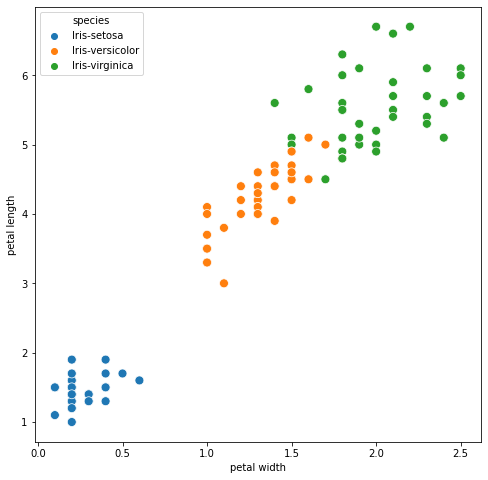

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
sns.scatterplot(x=iris.data['petal width'], y=iris.data['petal length'], hue=iris.data['species'], s=80, ax=ax);

### Also petal width VS sepal length

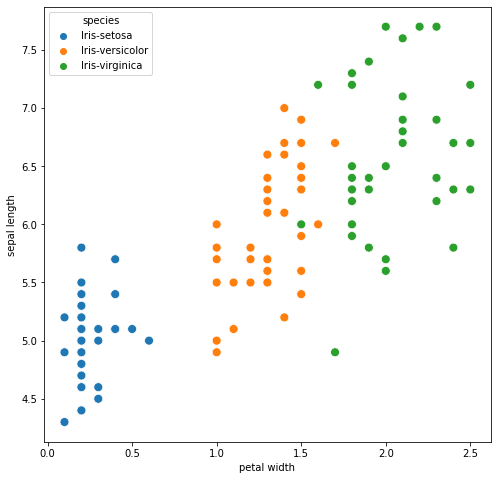

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
sns.scatterplot(x=iris.data['petal width'], y=iris.data['sepal length'], hue=iris.data['species'], s=80, ax=ax);

## check correlation

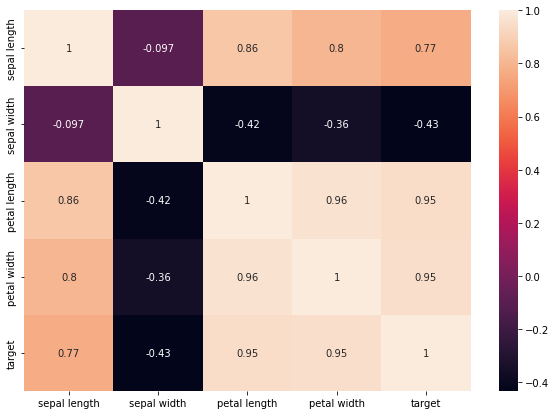

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
sns.heatmap(data=iris.data.corr(), ax=ax, annot=True);

## no skewness in the data

In [25]:
iris.calcSkew()

,0
sepal length,0.206731
petal width,-0.047114
sepal width,0.063974
petal length,-0.851653


In [26]:
iris.checkDistribution()

W_Statistic=0.975, p=0.02766164
sepal length does not look Gaussian (reject H0)
W_Statistic=0.905, p=0.00000043
petal width does not look Gaussian (reject H0)
W_Statistic=0.985, p=0.21164167
sepal width looks like gaussian (fail to reject H0)
W_Statistic=0.796, p=0.00000000
target does not look Gaussian (reject H0)
W_Statistic=0.879, p=0.00000002
petal length does not look Gaussian (reject H0)


(['sepal width'], ['sepal length', 'petal width', 'target', 'petal length'])

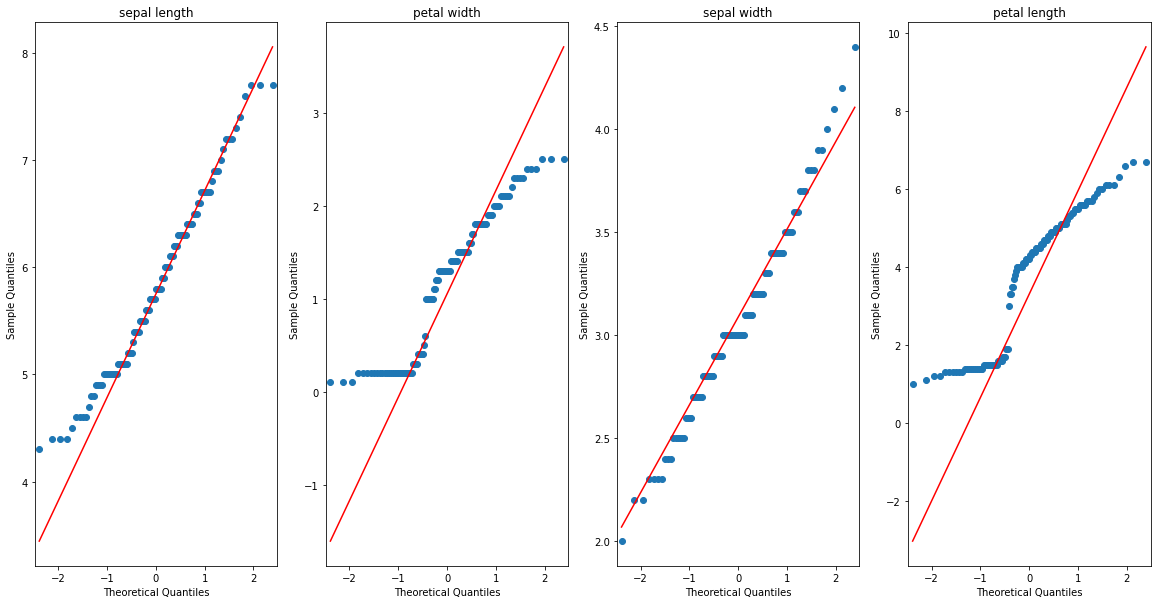

In [27]:
iris.drawQQ()

C:\Users\ZiKa\AppData\Local\Temp/ipykernel_6520/968836177.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  iris.data.hist(ax=ax);


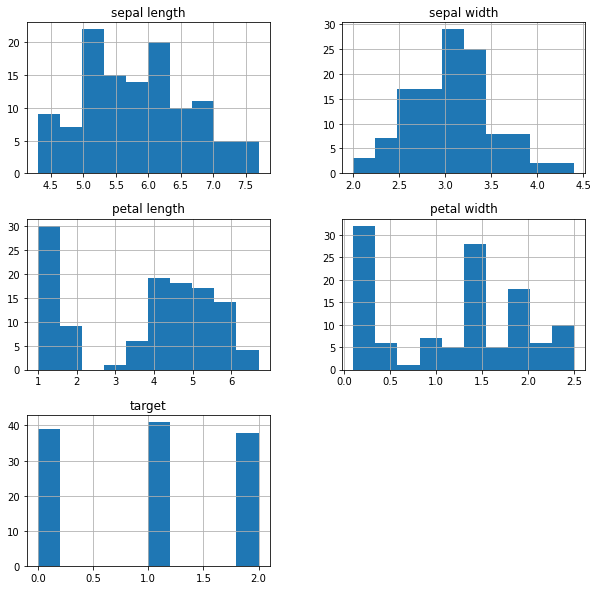

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
iris.data.hist(ax=ax);

In [29]:
colNames

['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

In [30]:
t = np.linspace(.1, .9, 9)
k = [1, 3, 5, 7, 10]

In [47]:
result = pd.DataFrame(columns=['test_size', 'neighbors', 'train_score', 'test_score'])
for n in k:
    KNN = KNeighborsClassifier(n_neighbors=n)
    for s in t:
        xTrain, xTest, yTrain, yTest = iris.trainTestSplit(test_size=s, include=['petal length', 'sepal length'], random_state=42)
        KNN.fit(xTrain, yTrain)
        data = {
            "test_size": s,
            "neighbors": n,
            "train_score": KNN.score(xTrain, yTrain),
            "test_Score": KNN.score(xTest, yTest)
               }
        result.loc[len(result.index)] = [s, n, KNN.score(xTrain, yTrain), KNN.score(xTest, yTest)]

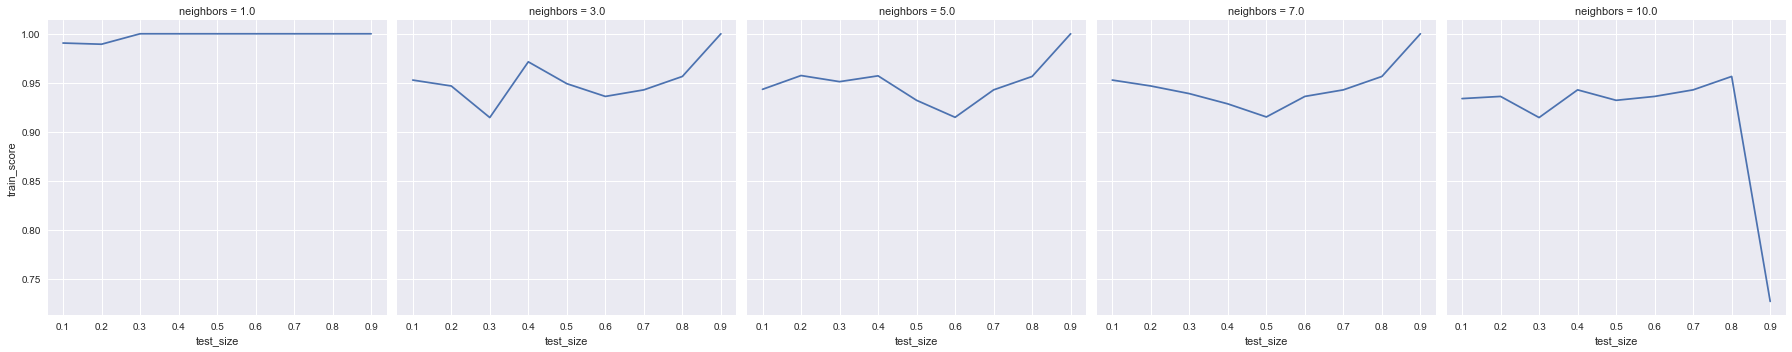

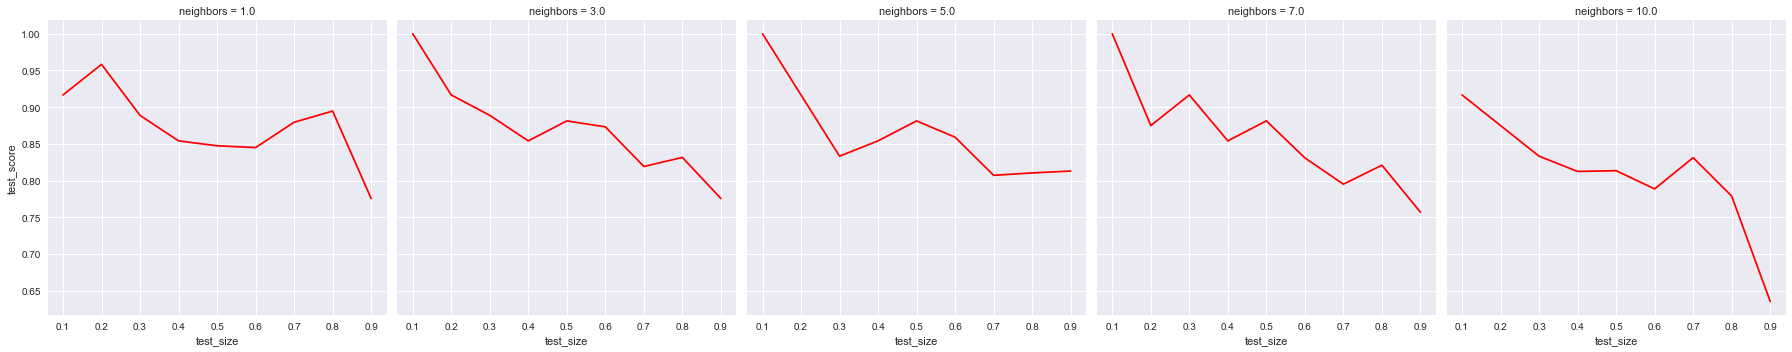

In [48]:
plt.style.use("seaborn")
sns.relplot(data=result, col='neighbors', x='test_size', y="train_score", kind='line')
sns.relplot(data=result, col='neighbors', x='test_size', y="test_score", kind='line', color='Red');